In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({'font.size':20})

In [2]:
df = pd.read_csv("./data/simple_benchmarks.csv")
df

,model name,model size,cana timesteps,cana walkers,cana time,cubewalkers timesteps,cubewalkers walkers,cubewalkers time,boolean2 timesteps,boolean2 walkers,boolean2 time
0,Apoptosis Network,41,500,500,6.451820,2500,2500,0.841222,100,100,8.765271
1,Arabidopsis thaliana Cell Cycle,14,500,500,2.190130,2500,2500,0.542933,100,100,7.864087
2,Aurora Kinase A in Neuroblastoma,23,500,500,3.228873,2500,2500,0.509679,100,100,6.531860
3,B bronchiseptica and T retortaeformis coinfection,53,500,500,9.257491,2500,2500,0.655082,100,100,15.689897
4,B cell differentiation,22,500,500,3.074711,2500,2500,0.504514,100,100,5.628456
5,Bordetella bronchiseptica,33,500,500,5.068250,2500,2500,0.590135,100,100,8.301764
6,Bortezomib Responses in U266 Human Myeloma Cells,67,500,500,11.469842,2500,2500,0.694694,100,100,15.602661
7,BT474 Breast Cell Line Long-term ErbB Network,24,500,500,3.639042,2500,2500,0.540123,100,100,8.812533
8,BT474 Breast Cell Line Short-term ErbB Network,16,500,500,2.307525,2500,2500,0.496234,100,100,6.140864
9,Budding Yeast Cell Cycle 2009,18,500,500,2.640313,2500,2500,0.551735,100,100,6.568871


In [3]:
print(f"{df['boolean2 time'].median()=}\n{df['cana time'].median()=}\n{df['cubewalkers time'].median()=}")
print()
print(f"{df['boolean2 time'].median()*625=}\n{df['cana time'].median()*25=}\n{df['cubewalkers time'].median()*1=}")
print()
print(f"{df['boolean2 time'].mean()=}\n{df['cana time'].mean()=}\n{df['cubewalkers time'].mean()=}")
print()
print(f"{df['boolean2 time'].mean()*625=}\n{df['cana time'].mean()*25=}\n{df['cubewalkers time'].mean()*1=}")

df['boolean2 time'].median()=8.765271200001735
df['cana time'].median()=4.065127950001624
df['cubewalkers time'].median()=0.5433714999999211

df['boolean2 time'].median()*625=5478.294500001084
df['cana time'].median()*25=101.62819875004061
df['cubewalkers time'].median()*1=0.5433714999999211

df['boolean2 time'].mean()=12.875534132394561
df['cana time'].mean()=9.743197648611435
df['cubewalkers time'].mean()=0.6941045583333916

df['boolean2 time'].mean()*625=8047.208832746601
df['cana time'].mean()*25=243.57994121528588
df['cubewalkers time'].mean()*1=0.6941045583333916


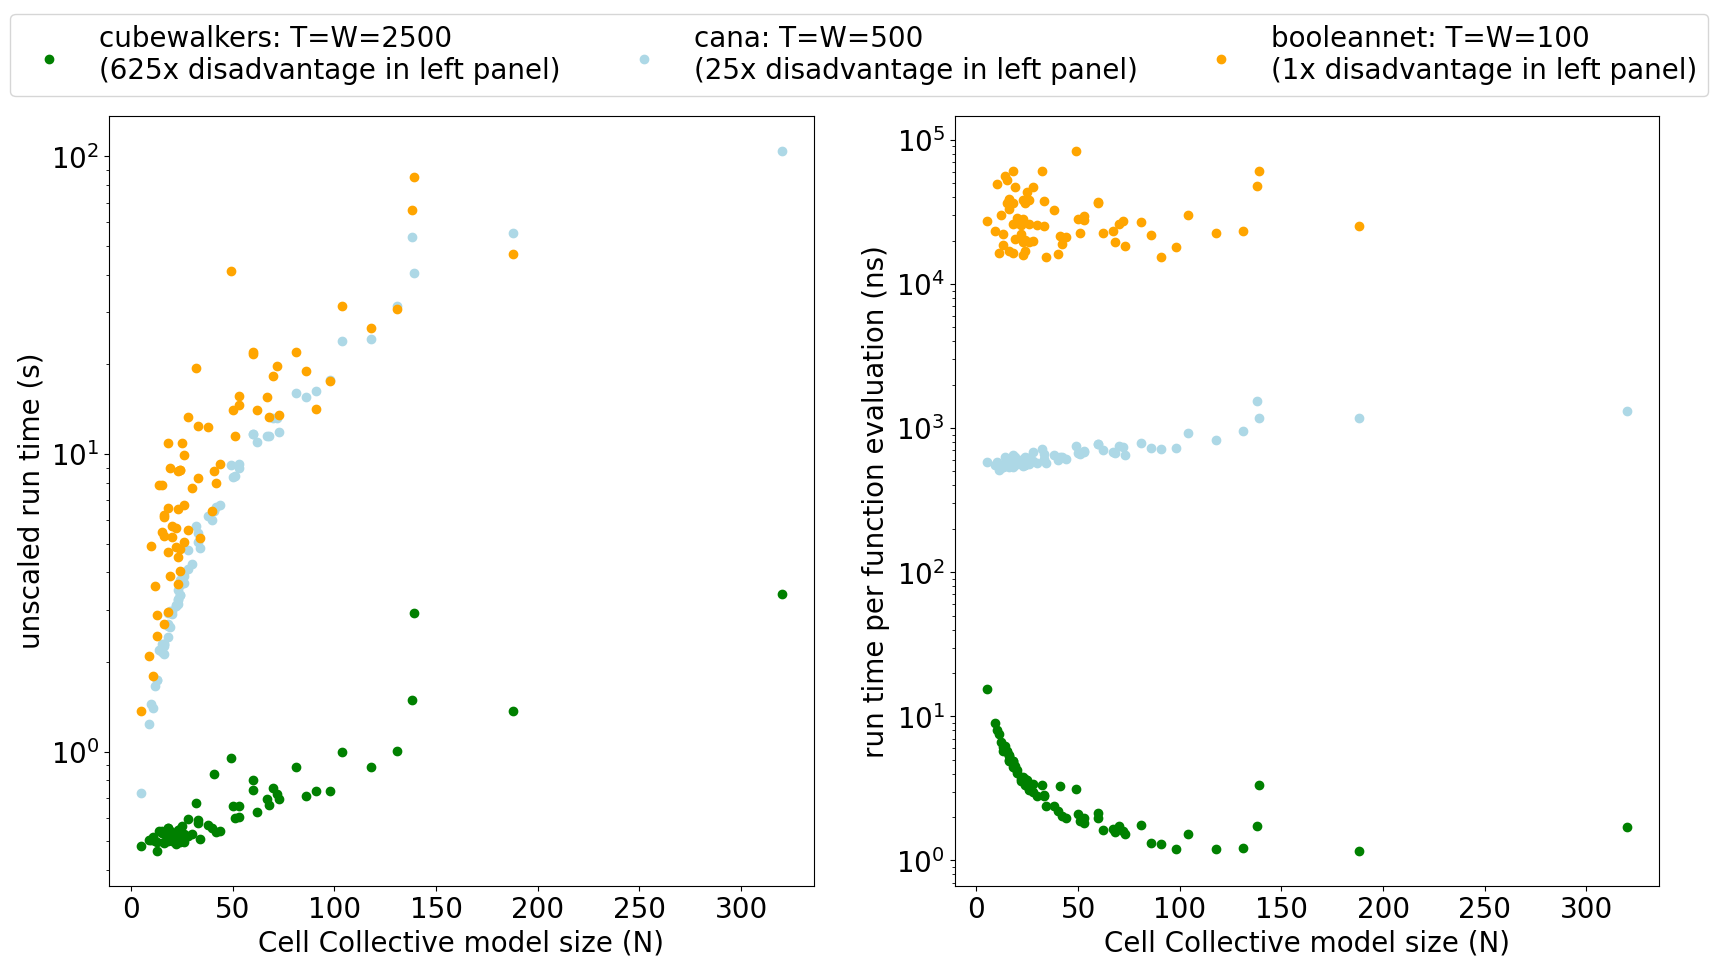

In [4]:
fig,ax = plt.subplots(1,2,figsize=(20, 10))
fig.set_facecolor('white')

boolean2_ops = df['boolean2 timesteps']*df['boolean2 walkers']
cana_ops = df['cana timesteps']*df['cana walkers']
cubewalkers_ops = df['cubewalkers timesteps']*df['cubewalkers walkers']

ax[0].scatter(df['model size'],df['cubewalkers time'], c='green', label=f'cubewalkers: T=W=2500')
ax[0].scatter(df['model size'],df['cana time'], c='lightblue', label=f'cana: T=W=500')
ax[0].scatter(df['model size'],df['boolean2 time'], c= 'orange', label=f'booleannet: T=W=100')
ax[0].set_yscale('log')
ax[0].set_ylabel('unscaled run time (s)')
ax[0].set_xlabel('Cell Collective model size (N)')

ax[1].set_title(' ')
ax[1].scatter(df['model size'],1e9*df['cubewalkers time']/cubewalkers_ops/df['model size'], c='green', label='cubewalkers')
ax[1].scatter(df['model size'],1e9*df['cana time']/cana_ops/df['model size'], c='lightblue', label='cana')
ax[1].scatter(df['model size'],1e9*df['boolean2 time']/boolean2_ops/df['model size'], c= 'orange', label='booleannet')
ax[1].set_yscale('log')
ax[1].set_ylabel('run time per function evaluation (ns)')
ax[1].set_xlabel('Cell Collective model size (N)')

fig.legend(["cubewalkers: T=W=2500\n(625x disadvantage in left panel)","cana: T=W=500\n(25x disadvantage in left panel)","booleannet: T=W=100\n(1x disadvantage in left panel)"],loc='upper center',ncols=3)
fig.tight_layout()
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarks.png')
fig.tight_layout() # not sure why this needs to be done twice, but without this, the legend is cut off in the pdf
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarks.pdf')

In [5]:
df = pd.read_csv("./data/simple_benchmarks_spaceboy.csv")
df

,model name,model size,cana timesteps,cana walkers,cana time,cubewalkers timesteps,cubewalkers walkers,cubewalkers time,boolean2 timesteps,boolean2 walkers,boolean2 time
0,Septation Initiation Network,30,2500,2500,3.086098,2500,2500,0.822582,500,500,5.634092
1,Mammalian Cell Cycle,20,2500,2500,2.764579,2500,2500,0.329310,500,500,4.338434
2,BT474 Breast Cell Line Short-term ErbB Network,16,2500,2500,2.331397,2500,2500,0.324308,500,500,4.751892
3,IL-6 Signalling,86,2500,2500,10.217819,2500,2500,0.401775,500,500,12.561574
4,Pro-inflammatory Tumor Microenvironment in Acu...,26,2500,2500,3.419722,2500,2500,0.357921,500,500,7.759374
5,Death Receptor Signaling,28,2500,2500,3.443083,2500,2500,0.332312,500,500,4.407972
6,Differentiation of T lymphocytes,50,2500,2500,6.059743,2500,2500,0.379511,500,500,9.636913
7,Signaling in Macrophage Activation,320,2500,2500,59.255650,2500,2500,1.102967,500,500,NaN
8,Colitis-associated colon cancer,70,2500,2500,9.113345,2500,2500,0.404408,500,500,12.192924
9,HIV-1 interactions with T Cell Signalling Pathway,138,2500,2500,40.628091,2500,2500,0.929003,500,500,44.431266


In [7]:
print(f"{df['boolean2 time'].median()=}\n{df['cana time'].median()=}\n{df['cubewalkers time'].median()=}")
print()
print(f"{df['boolean2 time'].median()*25=}\n{df['cana time'].median()=}\n{df['cubewalkers time'].median()*1=}")
print()
print(f"{df['boolean2 time'].mean()=}\n{df['cana time'].mean()=}\n{df['cubewalkers time'].mean()=}")
print()
print(f"{df['boolean2 time'].mean()*25=}\n{df['cana time'].mean()=}\n{df['cubewalkers time'].mean()*1=}")

df['boolean2 time'].median()=6.263391230255365
df['cana time'].median()=3.4055243227630854
df['cubewalkers time'].median()=0.3561375495046377

df['boolean2 time'].median()*25=156.58478075638413
df['cana time'].median()=3.4055243227630854
df['cubewalkers time'].median()*1=0.3561375495046377

df['boolean2 time'].mean()=9.144117711138138
df['cana time'].mean()=6.90468131352423
df['cubewalkers time'].mean()=0.41587378803847563

df['boolean2 time'].mean()*25=228.60294277845347
df['cana time'].mean()=6.90468131352423
df['cubewalkers time'].mean()*1=0.41587378803847563


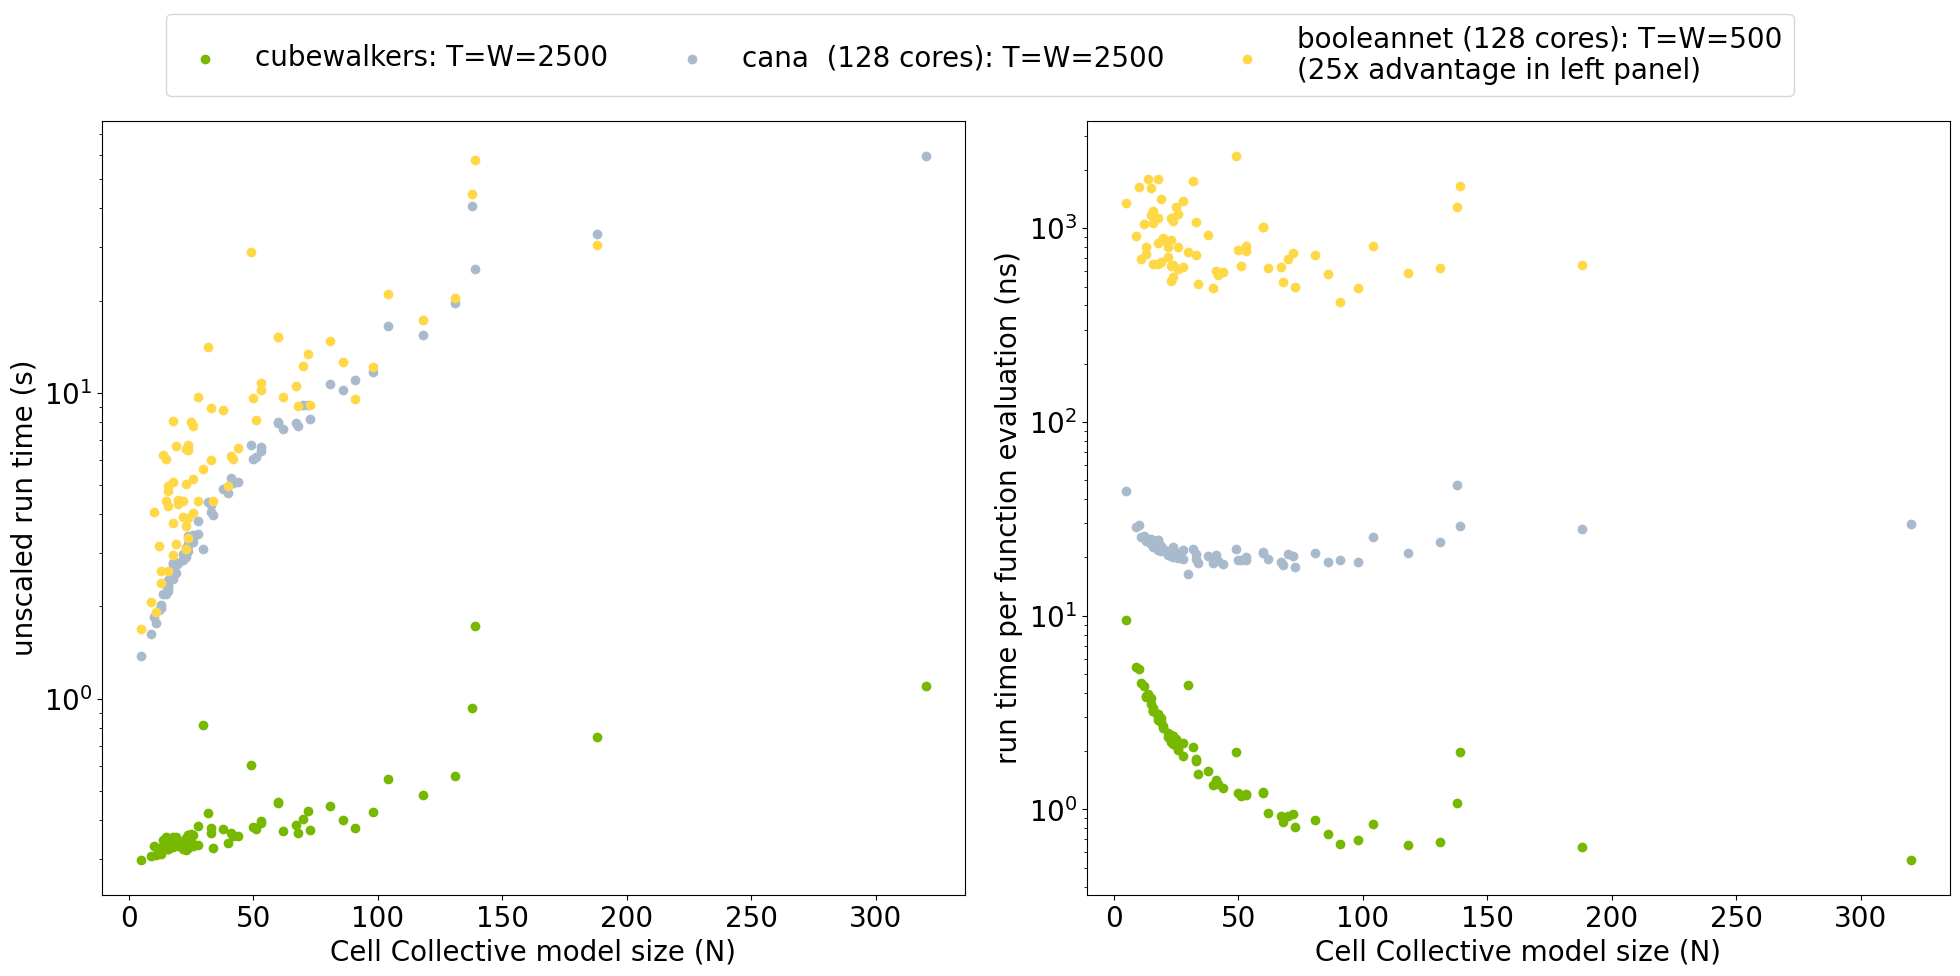

In [19]:
fig,ax = plt.subplots(1,2,figsize=(20, 10))
fig.set_facecolor('white')

boolean2_ops = df['boolean2 timesteps']*df['boolean2 walkers']
cana_ops = df['cana timesteps']*df['cana walkers']
cubewalkers_ops = df['cubewalkers timesteps']*df['cubewalkers walkers']

ax[0].scatter(df['model size'],df['cubewalkers time'], c='#76b900', label=f'cubewalkers: T=W=2500')
ax[0].scatter(df['model size'],df['cana time'], c='#AABACD', label=f'cana (128 cores): T=W=2500')
ax[0].scatter(df['model size'],df['boolean2 time'], c= '#FFD848', label=f'booleannet (128 cores): T=W=500')
ax[0].set_yscale('log')
ax[0].set_ylabel('unscaled run time (s)')
ax[0].set_xlabel('Cell Collective model size (N)')

ax[1].set_title(' ')
ax[1].scatter(df['model size'],1e9*df['cubewalkers time']/cubewalkers_ops/df['model size'], c='#76b900', label='cubewalkers')
ax[1].scatter(df['model size'],1e9*df['cana time']/cana_ops/df['model size'], c='#AABACD', label='cana')
ax[1].scatter(df['model size'],1e9*df['boolean2 time']/boolean2_ops/df['model size'], c= '#FFD848', label='booleannet')
ax[1].set_yscale('log')
ax[1].set_ylabel('run time per function evaluation (ns)')
ax[1].set_xlabel('Cell Collective model size (N)')

fig.legend(["cubewalkers: T=W=2500","cana  (128 cores): T=W=2500","booleannet (128 cores): T=W=500\n(25x advantage in left panel)"],loc='upper center',ncols=3)
fig.tight_layout()
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarks_spaceboy.png')
fig.tight_layout() # not sure why this needs to be done twice, but without this, the legend is cut off in the pdf
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarksspaceboy.pdf')